# Trabalho de inteligencia artificial

## Autores
- _Brenda Aryelle_
    - **RA**: 3019101902
- _Felipe Moresqui_
    - **RA**: 3019100222
- _Lucas Alves Ribeiro_
    - **RA**: 3019103813
- _Vinicius Zapalá dos Santos_
    - **RA**: 3019109027

## Entregas
- [X] Entrega I
    - leitura dos dados, merge e geração de dataset único.
- [X] Entrega II
    - Análise exploratória do conjunto de dados e conclusões.
- [X] Entrega III
    - Modelo preditivo com tuning de parâmetros + Entregas I e II.
- [ ] Entrega IV
    - Deploy do modelo (API ou aplicação) + Entregas I, II e III.

# Importando Libs

In [299]:
import pandas as pd
import numpy as np
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


# Lendo Datasets

In [300]:
#creating variables for folder and files from datasets
dataFolder= "/content/data"

#creating a variable for path files, because their files have a similar name
dataFileName = "/reclamacoes-fundamentadas-sindec-"
defaultPath = dataFolder + dataFileName

print(defaultPath)

#setting datasets
df2012 = pd.read_csv(defaultPath+"2012.csv")
df2013 = pd.read_csv(defaultPath+"2013.csv")
df2014 = pd.read_csv(defaultPath+"2014.csv")
df2015 = pd.read_csv(defaultPath+"2015.csv")
df2016 = pd.read_csv(defaultPath+"2016.csv")

/content/data/reclamacoes-fundamentadas-sindec-


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Concatenando datasets

In [301]:
#creating a list for datasets will be concatenated
frames = [df2012, df2013, df2014, df2015, df2016]

#concatenating datasets
dfFull = pd.concat(frames)

In [302]:
dfFull.shape

(1206072, 23)

# Exportando dataset concatenado

In [303]:
#dfFull.to_csv(dataFolder+"/exported"+dataFileName+"full.csv")

## Análise exploratória do conjunto de dados e conclusões.

Entendendo Dataset

In [304]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206072 entries, 0 to 203485
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   AnoCalendario          1206072 non-null  int64  
 1   DataArquivamento       1206072 non-null  object 
 2   DataAbertura           1206072 non-null  object 
 3   CodigoRegiao           1206072 non-null  int64  
 4   Regiao                 1206072 non-null  object 
 5   UF                     1206072 non-null  object 
 6   strRazaoSocial         1206064 non-null  object 
 7   strNomeFantasia        1006636 non-null  object 
 8   Tipo                   1206072 non-null  int64  
 9   NumeroCNPJ             1153518 non-null  float64
 10  RadicalCNPJ            1152390 non-null  float64
 11  RazaoSocialRFB         1137442 non-null  object 
 12  NomeFantasiaRFB        547639 non-null   object 
 13  CNAEPrincipal          1133380 non-null  float64
 14  DescCNAEPrincipal  

serpadando as 100 primeiras linhas do dataset 

In [305]:
dfhead = dfFull.head(100)
dfhead

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,...,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
0,2012,2012-07-13 17:44:45.000,2009-09-17 10:48:42.000,3,Sudeste,ES,IBI PROMOTORA DE VENDAS LTDA.,IBI CARD,1,7.448120e+13,...,7490104.0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,N,54,Cartão de Crédito,32.0,Calculo de prestação em atraso,F,mais de 70 anos,29072040
1,2012,2012-07-13 17:37:19.000,2009-09-17 10:02:24.000,3,Sudeste,ES,SAMSUNG ELETRONICA DA AMAZONIA LTDA,SAMSUNG,1,2.802730e+11,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,101,"Telefone ( Convencional, Celular, Interfone, E...",102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,29115360
2,2012,2012-07-16 09:07:13.000,2009-09-17 11:36:47.000,3,Sudeste,ES,LINNU''S AUTOMOVEIS LTDA.,LINNUS AUTOMOVEIS,1,3.635548e+13,...,4512902.0,COMÉRCIO SOB CONSIGNAÇÃO DE VEÍCULOS AUTOMOTORES,N,129,Carro Nacional Zero ( Montadora ),111.0,Venda enganosa,M,entre 21 a 30 anos,29060110
3,2012,2012-12-10 09:05:09.000,2009-09-21 09:01:49.000,5,Centro-oeste,GO,AMAZON PC INDUSTRIA E COMERCIO DE MICROCOMPUTA...,AMAZON PC,1,1.614079e+12,...,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,75911000
4,2012,2012-07-13 17:51:01.000,2009-09-18 17:32:22.000,3,Sudeste,ES,OFFICINA REVESTIMENTOS LTDA ME,NaN,1,5.444155e+12,...,4744005.0,COMÉRCIO VAREJISTA DE MATERIAIS DE CONSTRUÇÃO ...,N,118,Material de Acabamento de Construção Pronto (P...,116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",M,Nao Informada,29090120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2012,2012-08-31 10:48:18.000,2008-03-31 10:48:01.000,2,Nordeste,CE,GRADIENTE ELETRONICA S/A (IGB ELETRÔNICA S/A),NaN,1,4.318536e+13,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",N,96,Televisão / Vídeo Cassete / Filmadora / Video-...,113.0,Falta de peca de reposição,M,entre 51 a 60 anos,60000000
96,2012,2012-06-06 13:41:47.000,2009-05-06 17:20:51.000,3,Sudeste,ES,JR EVENTOS E FORMATURAS LTDA ME,JR EVENTOS E FORMATURAS,1,7.339319e+12,...,7420004.0,FILMAGEM DE FESTAS E EVENTOS,S,91,"Artigo de audiovisual ( Fita Cassete, Disco, F...",116.0,"Contrato/pedido/orçamento (rescisão, descumpri...",F,entre 31 a 40 anos,NaN
97,2012,2012-06-06 13:48:05.000,2009-05-07 11:52:47.000,3,Sudeste,ES,MABE CAMPINAS ELETRODOMESTICOS S/A,DAKO / GE ELETRODOMÉSTICOS,1,4.604131e+13,...,2751100.0,"FABRICAÇÃO DE FOGÕES, REFRIGERADORES E MÁQUINA...",S,94,Geladeira e Freezer,102.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 51 a 60 anos,29140000
98,2012,2012-06-06 13:53:39.000,2009-05-07 12:38:38.000,3,Sudeste,ES,SONY BRASIL LTDA.,SONY,1,4.344704e+13,...,2640000.0,"FABRICAÇÃO DE APARELHOS DE RECEPÇÃO, REPRODUÇÃ...",S,102,Microcomputador / Produtos de Informática,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 21 a 30 anos,29043490


In [306]:
def counterValues(column, most_common):
  # creating array for values counter
  counterValues = []

  dfheadReplaced = dfhead.replace({np.nan:"Void Value"})# sorting out void values
  dfFullReplaced = dfFull.replace({np.nan:"Void Value"})# sorting out void values


  # Adding values in array counter
  for i in dfFullReplaced[column]:
      counterValues.append(str(i)) # adding respective values

  #counting Values
  counterWithVoid = Counter(counterValues)

  print(f'De {len(dfFullReplaced)} valores foram contados {len(counterWithVoid.items())} valores diferentes')
  print(f'sendo {counterWithVoid["Void Value"]} de valores vazios. \n')

  #removing void values
  counter = counterWithVoid
  del counter["Void Value"]

  print(f'Os {most_common} valores mais comums: \n {counter.most_common(most_common)}')

  mostCommon = counter.most_common(most_common)
  plt.bar(*zip(*mostCommon))
  plt.show()


Contando valores que se repetem da `strNomeFantasia`

De 1206072 valores foram contados 85713 valores diferentes
sendo 199436 de valores vazios. 

Os 10 valores mais comums: 
 [('OI', 17758), ('SKY', 14357), ('CLARO', 14090), ('OI FIXO', 11129), ('SAMSUNG', 9224), ('VIVO', 8528), ('RICARDO ELETRO', 8355), ('MOTOROLA', 7533), ('TIM CELULAR', 6506), ('CCE', 5672)]


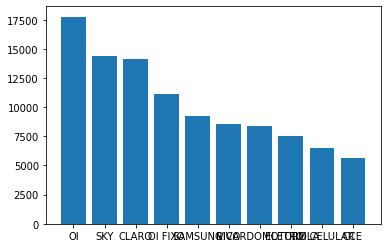

In [307]:
counterValues("strNomeFantasia", 10)

Contando valores que se repetem da `região`

De 1206072 valores foram contados 5 valores diferentes
sendo 0 de valores vazios. 

Os 5 valores mais comums: 
 [('3', 424311), ('2', 404186), ('5', 188611), ('4', 104154), ('1', 84810)]


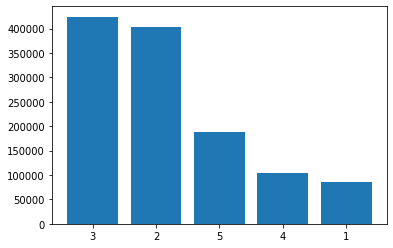

In [308]:
counterValues("CodigoRegiao", 5)


Contando valores que se repetem por data de abertura e arquivamento.

De 1206072 valores foram contados 975105 valores diferentes
sendo 0 de valores vazios. 

Os 5 valores mais comums: 
 [('2015-11-19 00:56:46.000', 201), ('2015-11-19 00:56:57.000', 169), ('2015-11-19 00:56:48.000', 166), ('2015-11-19 00:56:50.000', 165), ('2015-11-19 00:56:51.000', 157)]


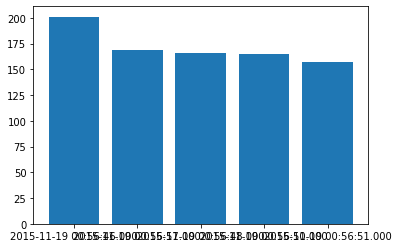

In [309]:
counterValues("DataAbertura", 5)


De 1206072 valores foram contados 754395 valores diferentes
sendo 0 de valores vazios. 

Os 5 valores mais comums: 
 [('2015-12-31 00:00:00.000', 1507), ('2012-01-01 00:00:00.000', 686), ('2012-12-01 00:00:00.000', 448), ('2013-03-01 00:00:00.000', 269), ('2014-01-01 00:00:00.000', 256)]


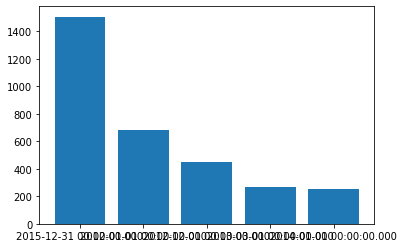

In [310]:
counterValues("DataArquivamento", 5)


Gerando a coluna de duração de chamadas

In [311]:
openedDate = dfFull['DataAbertura']
archivatedDate = dfFull['DataArquivamento']

In [312]:
openedDate

0         2009-09-17 10:48:42.000
1         2009-09-17 10:02:24.000
2         2009-09-17 11:36:47.000
3         2009-09-21 09:01:49.000
4         2009-09-18 17:32:22.000
                   ...           
203481    2016-05-06 11:21:45.000
203482    2016-05-02 15:28:57.000
203483    2016-04-29 16:20:30.000
203484    2016-04-19 07:58:16.000
203485    2016-04-19 08:42:27.000
Name: DataAbertura, Length: 1206072, dtype: object

In [313]:
dfFull['DataArquivamento'] = dfFull['DataArquivamento'].astype(np.datetime64)
dfFull['DataAbertura'] =  dfFull['DataAbertura'].astype(np.datetime64)

In [314]:
dfFull['DuracaoChamada'] = dfFull['DataArquivamento'] - dfFull['DataAbertura']
dfFull['DuracaoChamada'] = dfFull['DuracaoChamada'].dt.days.astype(int)

In [315]:
def filterColumns(df, columns):
  if(columns is None):
    return;
  df.drop(df.columns.difference(columns), 1, inplace=True)


In [316]:
NecessaryColumns = [
  'AnoCalendario',
  'CodigoRegiao',
  'Tipo',
  'CodigoAssunto',
  'DuracaoChamada'
]

filterColumns(dfFull, NecessaryColumns)
dfFull.dropna()
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206072 entries, 0 to 203485
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   AnoCalendario   1206072 non-null  int64
 1   CodigoRegiao    1206072 non-null  int64
 2   Tipo            1206072 non-null  int64
 3   CodigoAssunto   1206072 non-null  int64
 4   DuracaoChamada  1206072 non-null  int64
dtypes: int64(5)
memory usage: 55.2 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Gerando um modelo de predição

In [317]:
x = dfFull
X = x.drop('DuracaoChamada',axis=1) 
y = x['DuracaoChamada']
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.3, train_size=0.6)

In [318]:
print("X Treino \n-------------------------------------------------------------------------")
print(xTrain)

print("x Test \n-------------------------------------------------------------------------")
print(xTest)

print("Y Treino \n-------------------------------------------------------------------------")
print(yTrain)

print("Y test \n-------------------------------------------------------------------------")
print(yTest)

X Treino 
-------------------------------------------------------------------------
        AnoCalendario  CodigoRegiao  Tipo  CodigoAssunto
125962           2012             2     1             98
1910             2013             4     1            264
257256           2014             3     1            186
166530           2013             3     1            235
240745           2014             4     1             54
...               ...           ...   ...            ...
208230           2014             2     1            259
239203           2013             2     1             96
251296           2014             1     1             54
131536           2016             2     1            234
103289           2014             3     1             54

[723643 rows x 4 columns]
x Test 
-------------------------------------------------------------------------
        AnoCalendario  CodigoRegiao  Tipo  CodigoAssunto
104923           2016             4     1             63
37148    

Usando o modelo XGB

In [319]:
xgbModel = XGBRegressor()
xgbModel.fit(xTrain, yTrain)
yPrediction = xgbModel.predict(xTest)

[23:35:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [320]:
r2_score(yTest, yPrediction)

0.09156458152822922

Usando o modelo Floresta aleatoria

In [321]:
RandomForestModel = RandomForestRegressor()

RandomForestModel.fit(xTrain, yTrain)

yPrediction = RandomForestModel.predict(xTest)

In [322]:
r2_score(yTest, yPrediction)

0.11516065407453968